In [2]:
import pandas as pd
import numpy as np

In [3]:
s = "Asia"
s_list = s.split()[-1]
s_list

'Asia'

In [4]:
df = pd.DataFrame({"category": np.random.choice(["A", "B", "C"], size = 10),
                   "number": np.random.randint(1, 21, size=10)})
df["ticket"] = df["category"] + df["number"].astype(str)
df.dtypes

category    object
number       int32
ticket      object
dtype: object

inaczej i szybciej i bardziej "pandasowo":

In [5]:
df = pd.DataFrame({
    "ticket": pd.Series(np.random.choice(["A", "B", "C"], size=10)) +
              pd.Series(np.random.randint(1, 21, size=10)).astype(str)
})
df

,ticket
0,A2
1,C6
2,B9
3,A20
4,A16
5,B1
6,C14
7,B16
8,C20
9,B2


tuta już regex chyba?

In [6]:
df["num"] = df["ticket"].str.extract(r'(\d+)').astype(int)
df["cat"] = df["ticket"].str[0]
df

,ticket,num,cat
0,A2,2,A
1,C6,6,C
2,B9,9,B
3,A20,20,A
4,A16,16,A
5,B1,1,B
6,C14,14,C
7,B16,16,B
8,C20,20,C
9,B2,2,B


teraz zmienna która może przyjąć jako wartości liczbę i literę

<Axes: xlabel='mixed'>

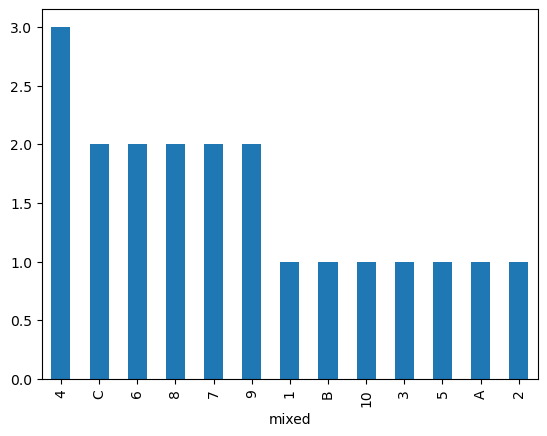

In [29]:
np.random.seed(0)
df = pd.DataFrame(np.random.choice(list(np.arange(1,11,1)) + ["A", "B", "C"], size=20), columns=["mixed"])
df["mixed"].value_counts().plot.bar()

In [30]:
df["num"] = pd.to_numeric(df["mixed"], errors="coerce")
df["cat"] = np.where(df["num"].isna(), df["mixed"], np.nan)
df

,mixed,num,cat
0,C,NaN,C
1,6,6.0,NaN
2,1,1.0,NaN
3,4,4.0,NaN
4,B,NaN,B
5,4,4.0,NaN
6,8,8.0,NaN
7,10,10.0,NaN
8,4,4.0,NaN
9,6,6.0,NaN
